In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
train = pd.read_csv('train.csv', header=None)
test = pd.read_csv('test.csv', header=None)
trainLabels = pd.read_csv('trainLabels.csv', header=None)

In [4]:
train.shape

(1000, 40)

In [5]:
trainLabels.shape

(1000, 1)

In [6]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [7]:
print(f'logistic regression: {cross_val_score(LogisticRegression(), train, trainLabels, cv=5).mean()}')
print(f'Random Forest: {cross_val_score(RandomForestClassifier(n_estimators=100), train, trainLabels, cv=5).mean()}')
print(f'GBDT: {cross_val_score(GradientBoostingClassifier(), train, trainLabels, cv=5).mean()}')
print(f'SVM: {cross_val_score(SVC(), train, trainLabels, cv=5).mean()}')

logistic regression: 0.82
Random Forest: 0.8619999999999999
GBDT: 0.861
SVM: 0.9120000000000001


In [8]:
SVM = SVC().fit(train, trainLabels)

In [9]:
svm_result = pd.DataFrame(SVM.predict(test), index=range(1,test.shape[0]+1)).reset_index()

In [10]:
svm_result.columns = ['Id', 'Solution']

In [11]:
svm_result.to_csv('submission.csv', index=False)

In [24]:
#%%html
#<img src="svm.png", width=700>

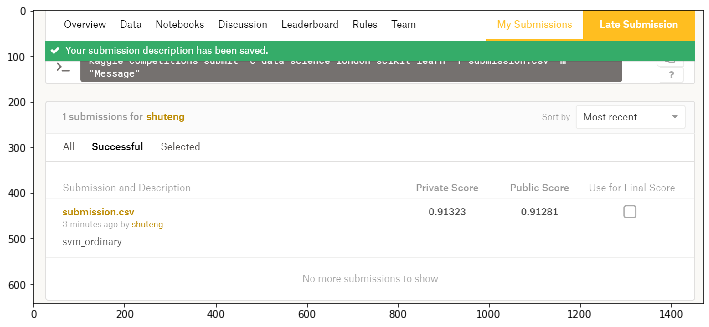

In [23]:
import cv2
img = cv2.imread("svm.png")
plt.figure(figsize=(12,12))
plt.imshow(img)